In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 2.9 MB 9.3 MB/s 
     |████████████████████████████████| 3.3 MB 35.3 MB/s 
     |████████████████████████████████| 895 kB 43.9 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 636 kB 38.7 MB/s 
     |████████████████████████████████| 1.2 MB 7.6 MB/s 


In [2]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *
from plotting_helper import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

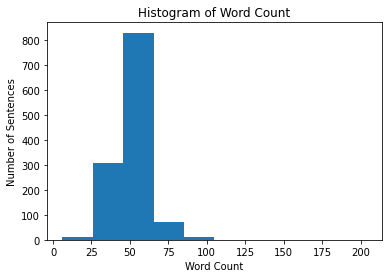

In [4]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [5]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [6]:
chk_point = 'xlm-roberta-base'
base_model, tokenizer = load_bert_model(chk_point)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [7]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [11]:
txt_only_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.TXT,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.1, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=1, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Text Only Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.712 / Validation : 0.686
Time for epoch : 8.555303 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.703 / Validation : 0.686
Time for epoch : 8.617776 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.694 / Validation : 0.683
Time for epoch : 10.634905 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.690 / Validation : 0.676
Time for epoch : 12.544062 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.677 / Validation : 0.637
Time for epoch : 12.251647 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.646 / Validation : 0.537
Time for epoch : 14.634727 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.547 / Validation : 0.531
Time for epoch : 11.509756 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.522 / Validation : 0.475
Time for epoch : 11.492988 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.532 / Validation : 0.509
Time for epoch

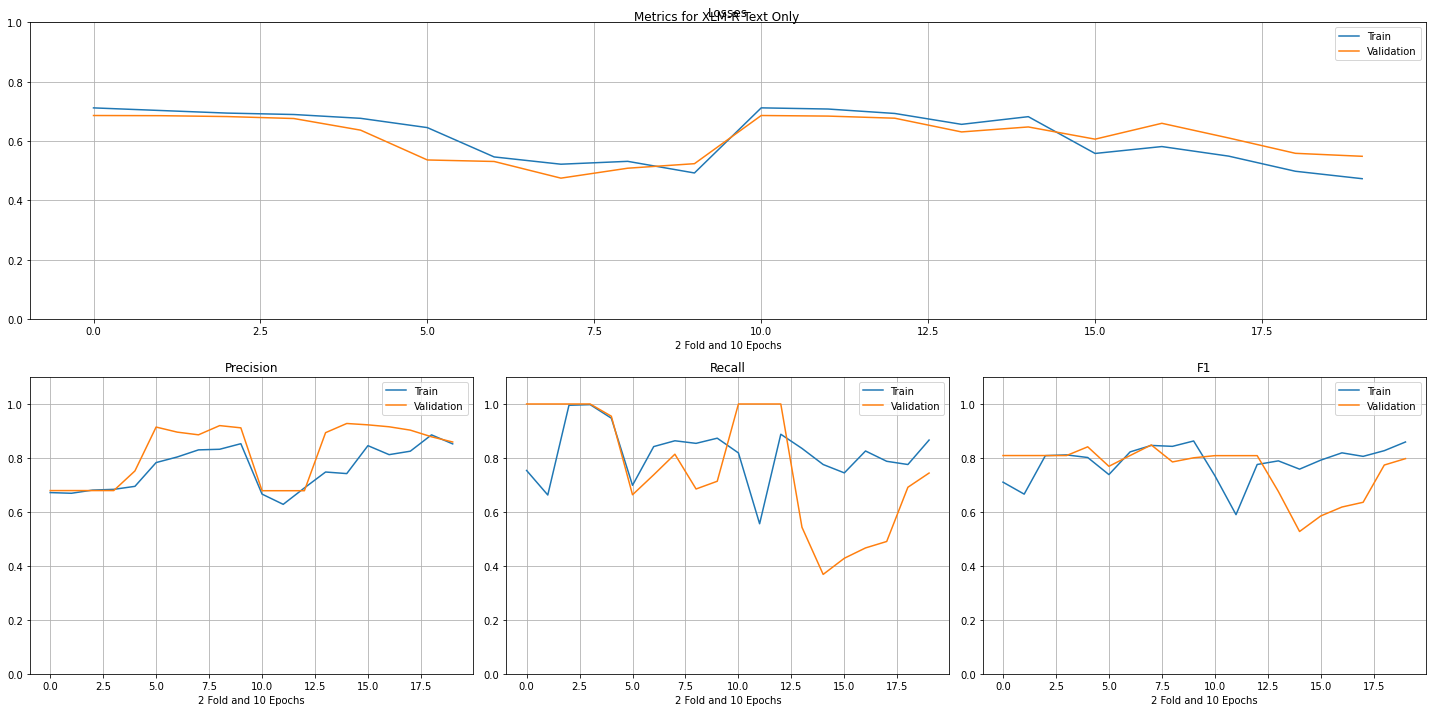

In [12]:
plot_results(txt_only_results[0],'XLM-R Text Only')

In [13]:
txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
7,0.829885,0.863636,0.846424,0.885714,0.813842,0.848259,0.522217,0.475240
4,0.694737,0.947368,0.801619,0.751880,0.954654,0.841220,0.676802,0.636959
6,0.803653,0.842105,0.822430,0.895652,0.737470,0.808901,0.546741,0.531406
3,0.683607,0.997608,0.811284,0.679092,1.000000,0.808880,0.689658,0.676139
2,0.680851,0.995215,0.808552,0.679092,1.000000,0.808880,0.694439,0.682759
0,0.671642,0.753589,0.710259,0.679092,1.000000,0.808880,0.711975,0.686287
1,0.669082,0.662679,0.665865,0.679092,1.000000,0.808880,0.703177,0.685715
2,0.688889,0.887828,0.775808,0.678571,1.000000,0.808511,0.693192,0.677189
0,0.666019,0.818616,0.734475,0.678571,1.000000,0.808511,0.712067,0.686309
1,0.628032,0.556086,0.589873,0.678571,1.000000,0.808511,0.708126,0.684336


In [14]:
mfcc_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MFCC,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.25, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=3, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Fusion Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model
Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.703 / Validation : 0.684
Time for epoch : 10.877881 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.699 / Validation : 0.683
Time for epoch : 10.862 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.690 / Validation : 0.682
Time for epoch : 10.821984 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.695 / Validation : 0.682
Time for epoch : 5.579206 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.689 / Validation : 0.682
Time for epoch : 5.557514 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.687 / Validation : 0.682
Time for epoch : 5.541953 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.682
Time for epoch : 5.594204 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.677 / Validation : 0.602
Time for epoch : 10.777676 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.614 / Validation : 0.558
Time for epoch : 10

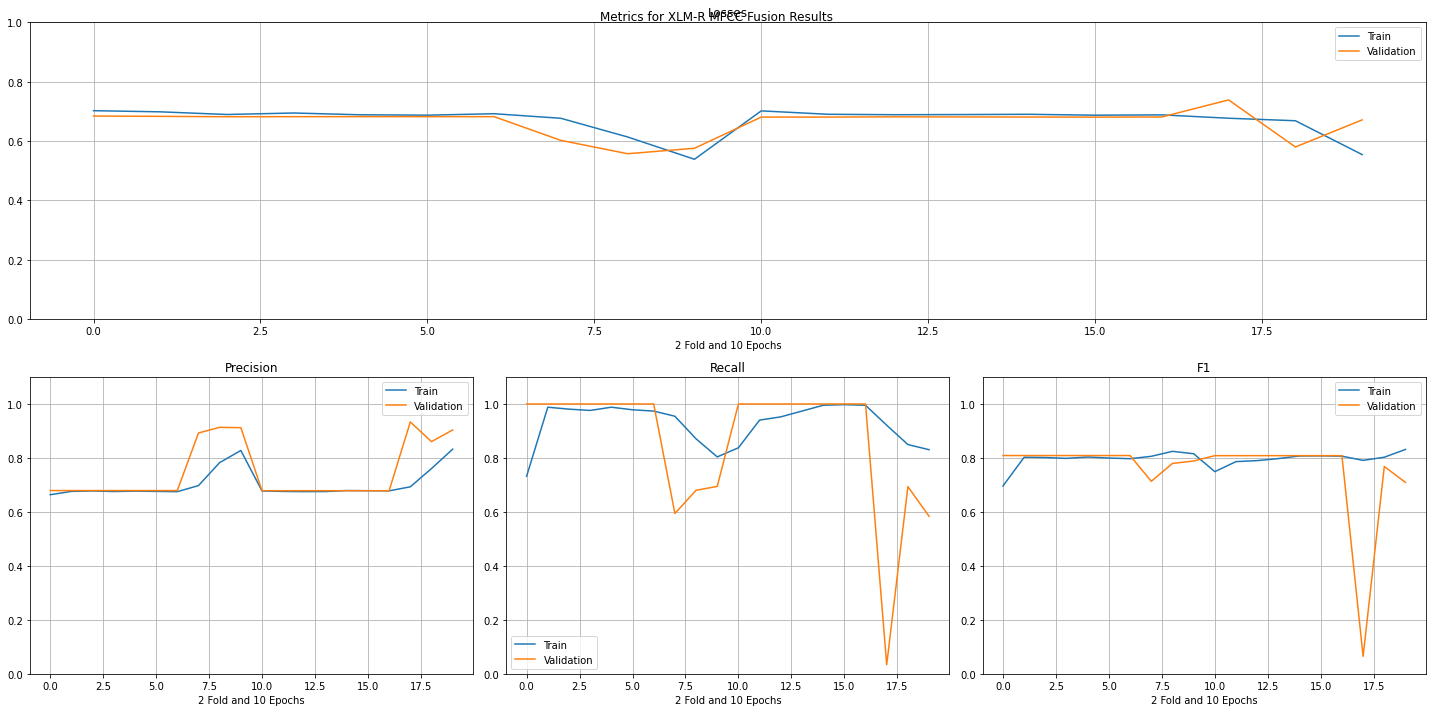

In [16]:
plot_results(mfcc_fusion_results[0],'XLM-R MFCC Fusion Results')

In [17]:
mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
4,0.677049,0.988038,0.803502,0.679092,1.000000,0.808880,0.688727,0.682442
1,0.675941,0.988038,0.802721,0.679092,1.000000,0.808880,0.698680,0.683421
2,0.677686,0.980861,0.801564,0.679092,1.000000,0.808880,0.689712,0.682176
5,0.676033,0.978469,0.799609,0.679092,1.000000,0.808880,0.687423,0.682449
3,0.675497,0.976077,0.798434,0.679092,1.000000,0.808880,0.694736,0.682411
6,0.674959,0.973684,0.797258,0.679092,1.000000,0.808880,0.692322,0.682389
0,0.663774,0.732057,0.696246,0.679092,1.000000,0.808880,0.702514,0.684498
5,0.678571,0.997613,0.807729,0.678571,1.000000,0.808511,0.687355,0.680843
4,0.679153,0.995227,0.807357,0.678571,1.000000,0.808511,0.690369,0.681173
6,0.678049,0.995227,0.806576,0.678571,1.000000,0.808511,0.688431,0.681342


In [23]:
mel_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MEL,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.1, lr=7e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=1, clip_at=1.0, img_path=IMG_PATH, hidden_dim=128)

Running Fusion Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.708 / Validation : 0.689
Time for epoch : 43.560519 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.695 / Validation : 0.689
Time for epoch : 38.726104 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.688
Time for epoch : 43.474626 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.688
Time for epoch : 43.877782 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.685
Time for epoch : 43.748606 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.690 / Validation : 0.681
Time for epoch : 43.486416 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.665 / Validation : 0.603
Time for epoch : 43.707096 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.580 / Validation : 0.596
Time for epoch : 43.587301 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.537 / Validation : 0.517
Time for epo

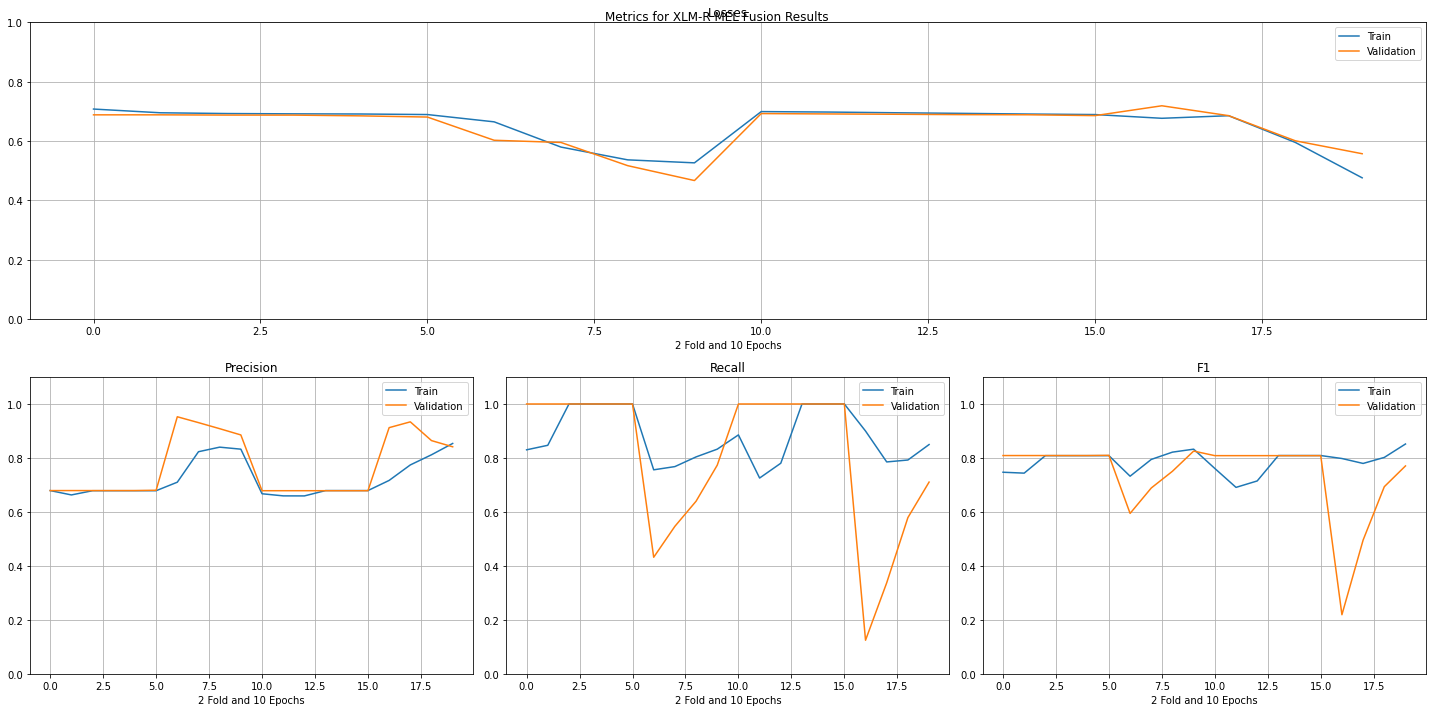

In [24]:
plot_results(mel_fusion_results[0], 'XLM-R MEL Fusion Results')

In [25]:
mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
9,0.832536,0.832536,0.832536,0.885246,0.773270,0.825478,0.526800,0.467175
5,0.678571,1.000000,0.808511,0.680195,1.000000,0.809662,0.689524,0.681103
2,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.692901,0.687758
3,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.691902,0.687642
4,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.691378,0.685112
0,0.679061,0.830144,0.747040,0.679092,1.000000,0.808880,0.708036,0.688550
1,0.662921,0.846890,0.743697,0.679092,1.000000,0.808880,0.695494,0.688568
5,0.679092,1.000000,0.808880,0.678571,1.000000,0.808511,0.689500,0.685907
4,0.679092,1.000000,0.808880,0.678571,1.000000,0.808511,0.691281,0.688763
3,0.679092,1.000000,0.808880,0.678571,1.000000,0.808511,0.693526,0.689234
